In [ ]:
!nvidia-smi # for check the gpu

Sun Feb 23 10:48:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Download Libraries

In [ ]:
!pip install ultralytics -q  # Library for YOLO model to train

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 17.5 MB/s eta 0:00:00a 0:00:01


# Import All Libraries

In [ ]:
import ultralytics
ultralytics.checks()        # Checks its availabe or not

Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.1/8062.4 GB disk)


In [6]:
import os
import shutil
import zipfile

from ultralytics import YOLO
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  

import warnings

warnings.filterwarnings("ignore") 

# Access Data and Train the Model

In [7]:

dataset ="/kaggle/input/trees-pic-datasets/zTrees_Pic_Datasets_(1)/"

In [8]:
!yolo task=detect mode=train data=/kaggle/input/trees-pic-datasets/zTrees_Pic_Datasets_\(1\)//data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 75.8MB/s]
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/input/trees-pic-datasets/zTrees_Pic_Datasets_(1)//data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

Results (results.csv):
    epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1   148.701         1.55856         1.90152         1.58686   
1       2   283.956         1.58493         1.68259         1.60826   
2       3   419.485         1.57507         1.62048         1.58762   
3       4   553.931         1.52471         1.55307         1.55696   
4       5   687.999         1.47576         1.47708         1.52745   
5       6   824.183         1.44988         1.42562         1.50573   
6       7   962.953         1.42049         1.37289         1.48153   
7       8  1098.550         1.38964         1.33287         1.45440   
8       9  1229.420         1.37261         1.30383         1.44178   
9      10  1363.230         1.38290         1.30041         1.44190   
10     11  1496.360         1.35091         1.26467         1.42241   
11     12  1629.980         1.33883         1.26158         1.42240   
12     13  1762.590         1.32054         1.22501   

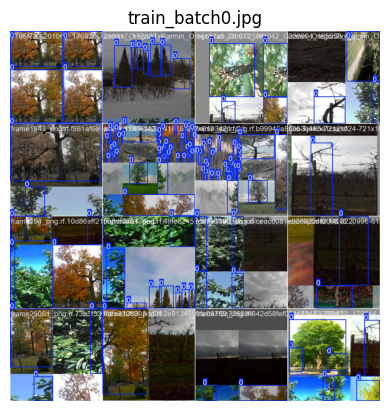

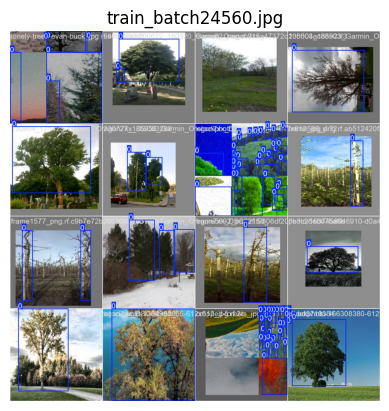

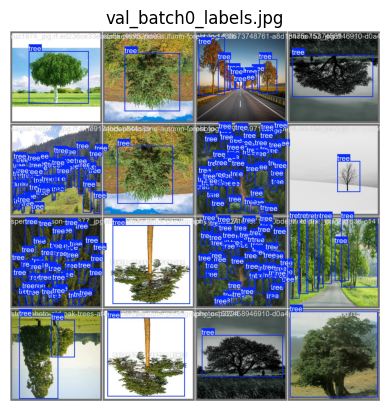

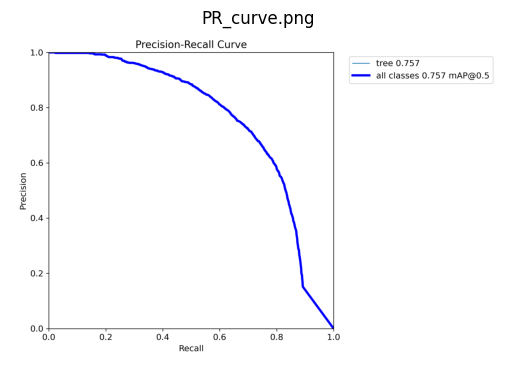

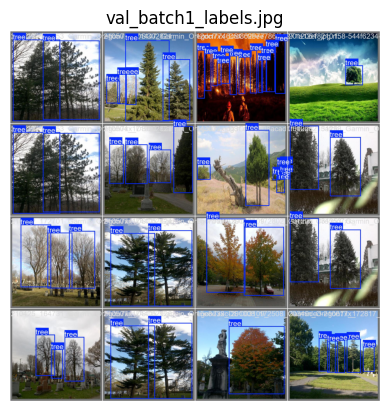

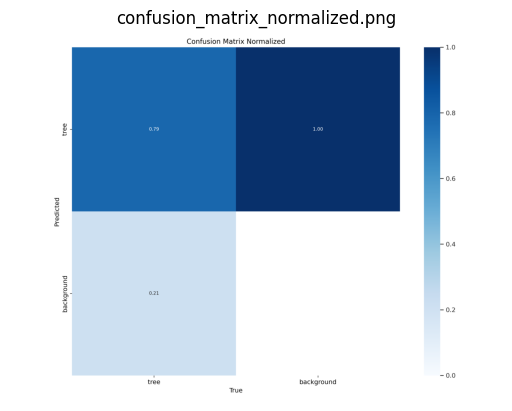

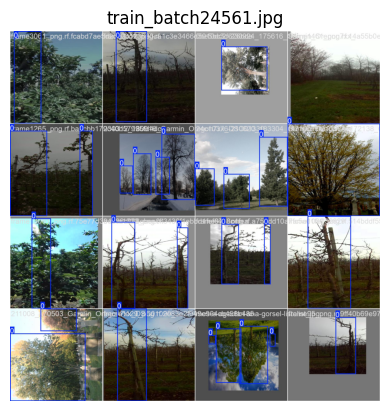

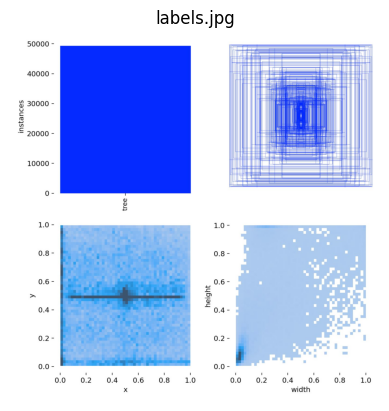

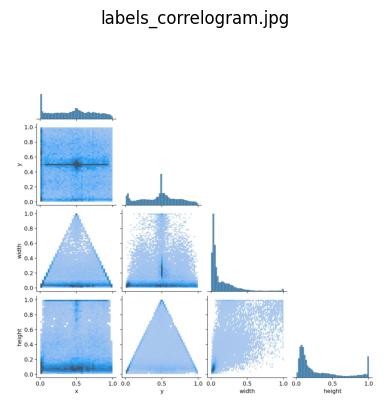

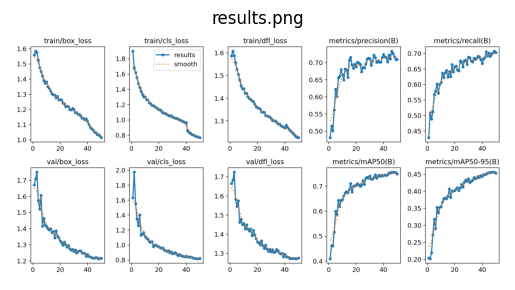

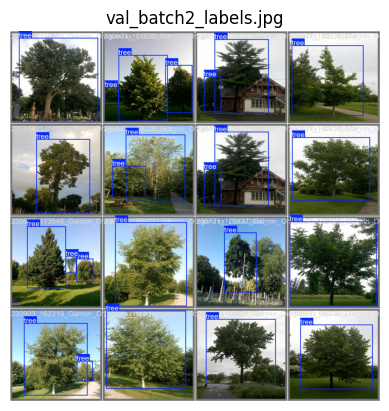

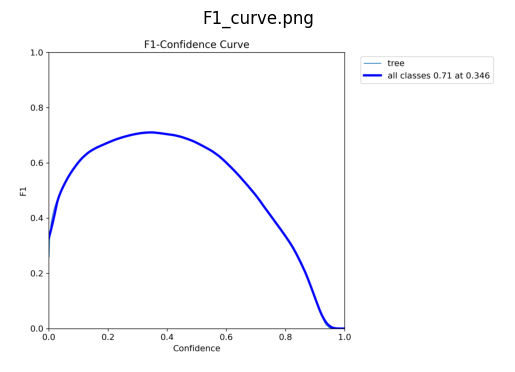

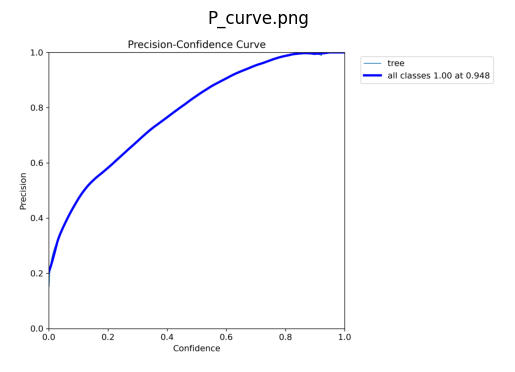

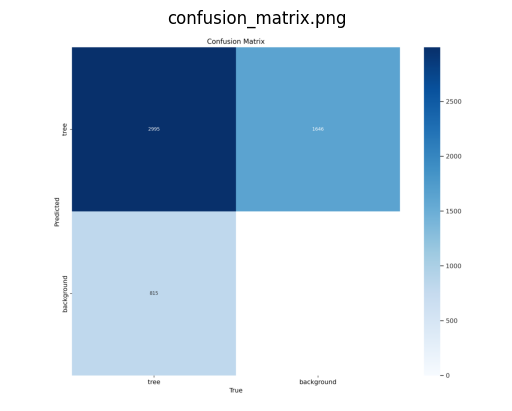

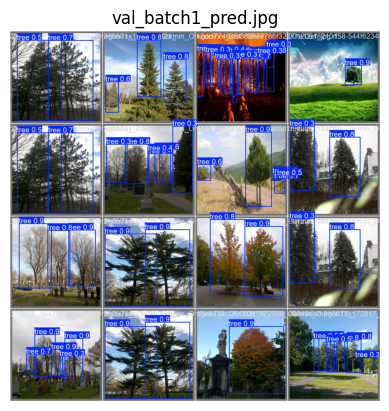

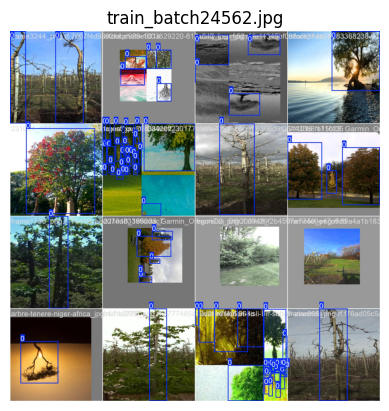

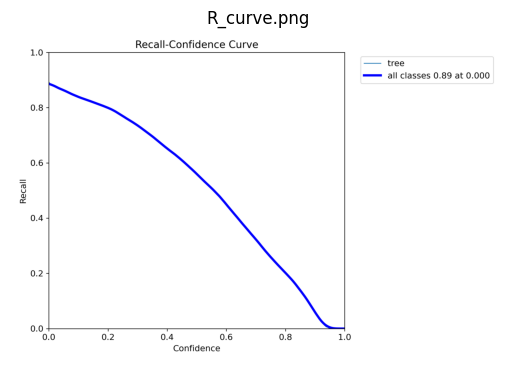

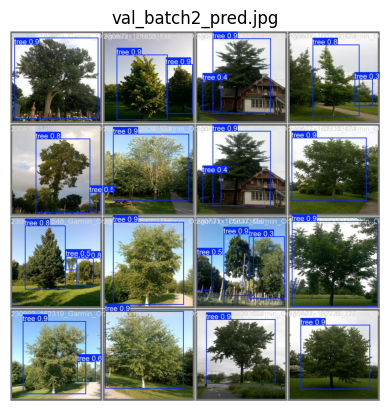

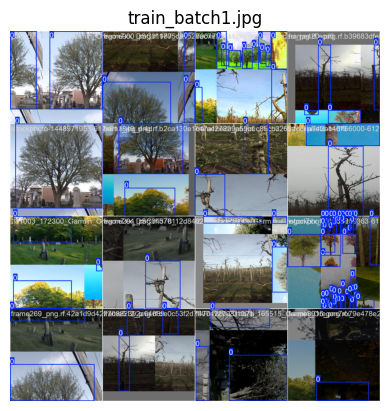

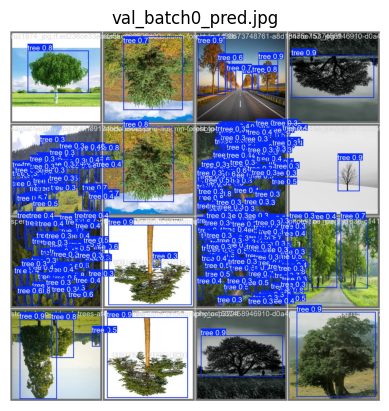

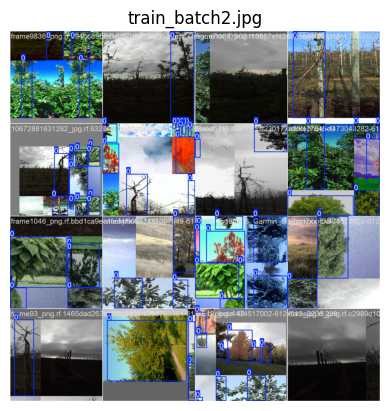


best.pt found.
last.pt found.


In [ ]:

def display_training_results(results_dir):
    """Displays YOLO training results from a directory."""

    if not os.path.exists(results_dir):
        print(f"Error: Directory '{results_dir}' not found.")
        return

    #  Display results.csv
    results_csv_path = os.path.join(results_dir, "results.csv")
    if os.path.exists(results_csv_path):
        try:
            df = pd.read_csv(results_csv_path)
            print("Results (results.csv):")
            print(df)  
        except FileNotFoundError:
            print(f"results.csv not found in {results_dir}")
        except pd.errors.ParserError:
            print(f"Error parsing results.csv. Check the file format.")
        except Exception as e:
            print(f"Error displaying results.csv: {e}")
    else:
        print("results.csv not found.")

    # 2. Display images 
    image_files = [f for f in os.listdir(results_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]  # Get image files
    for image_file in image_files:
        image_path = os.path.join(results_dir, image_file)
        try:
            img = mpimg.imread(image_path)  
            plt.figure()  
            plt.imshow(img)
            plt.title(image_file)
            plt.axis('off')  
            plt.show()

        except FileNotFoundError:
            print(f"Image not found: {image_path}")
        except Exception as e:
            print(f"Error displaying image {image_path}: {e}")

    
    best_pt_path = os.path.join(results_dir, "weights", "best.pt")
    last_pt_path = os.path.join(results_dir, "weights", "last.pt")

    if os.path.exists(best_pt_path):
        print("\nbest.pt found.")
        
    else:
        print("\nbest.pt not found.")

    if os.path.exists(last_pt_path):
        print("last.pt found.")
        
    else:
        print("last.pt not found.")



results_directory = "/kaggle/working/runs/detect/train"  
display_training_results(results_directory)

In [ ]:

def zip_directory(directory_to_zip, output_zip_file):
    """Zips a directory and its contents."""

    if not os.path.exists(directory_to_zip):
        print(f"Error: Directory '{directory_to_zip}' not found.")
        return

    try:

        
        with zipfile.ZipFile(output_zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
            for root, dirs, files in os.walk(directory_to_zip):
                for file in files:
                    file_path = os.path.join(root, file)
                    zipf.write(file_path, arcname=os.path.relpath(file_path, directory_to_zip))

        print(f"Directory '{directory_to_zip}' zipped to '{output_zip_file}'")

    except Exception as e:
        print(f"Error zipping directory: {e}")



directory_to_zip = "/kaggle/working/runs/detect/train"  
output_zip_file = "/kaggle/working/train_02_50epoch_nice.zip" 
zip_directory(directory_to_zip, output_zip_file)

Directory '/kaggle/working/runs/detect/train' zipped to '/kaggle/working/train_02_50epoch_nice.zip'
